In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('C:/Users/hatice.kocabas/Desktop\e ticaret\Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.shape

(541909, 8)

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
#df.drop(columns=['CustomerID','Description'])

In [9]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

total_revenue = df["Revenue"].sum()
print(f"Toplam Gelir: £{total_revenue:,.2f}")


Toplam Gelir: £9,747,747.93


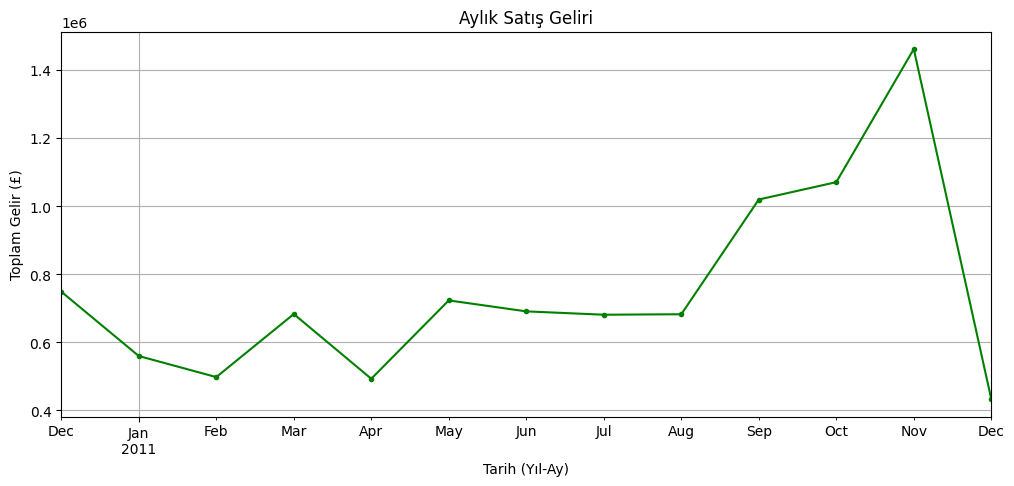

In [10]:
import matplotlib.pyplot as plt

df["Month"] = df["InvoiceDate"].dt.to_period("M") 
monthly_sales = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker=".", linestyle="-", color="g")
plt.xlabel("Tarih (Yıl-Ay)")
plt.ylabel("Toplam Gelir (£)")
plt.title("Aylık Satış Geliri")
plt.grid(True)
plt.show()


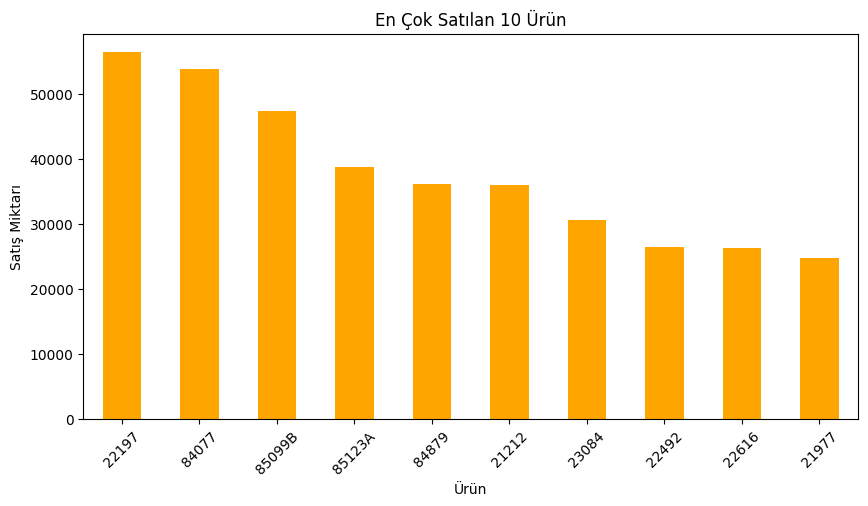

In [11]:
top_products = df.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="orange")
plt.xlabel("Ürün")
plt.ylabel("Satış Miktarı")
plt.title("En Çok Satılan 10 Ürün")
plt.xticks(rotation=45)
plt.show()


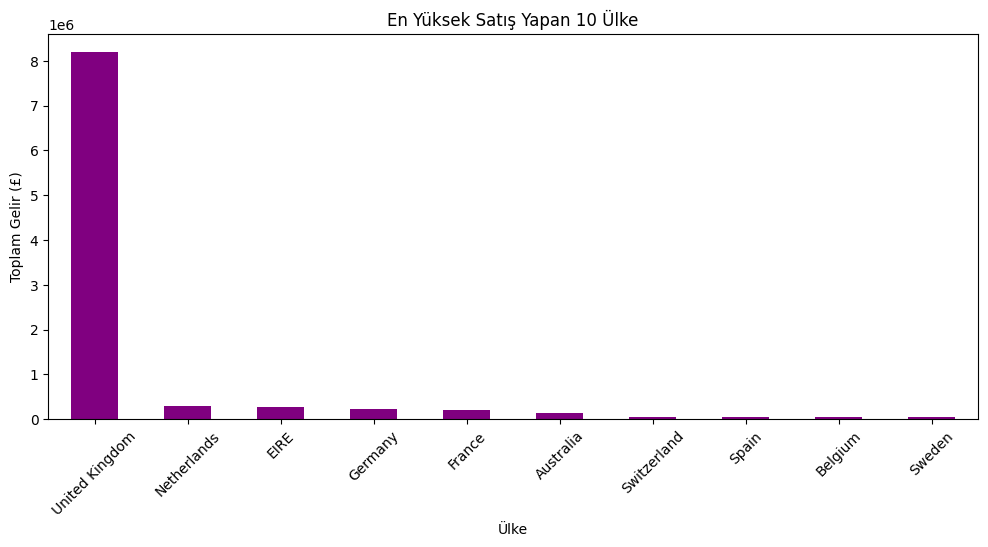

In [12]:
country_sales = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
country_sales.head(10).plot(kind="bar", color="purple")
plt.xlabel("Ülke")
plt.ylabel("Toplam Gelir (£)")
plt.title("En Yüksek Satış Yapan 10 Ülke")
plt.xticks(rotation=45)
plt.show()


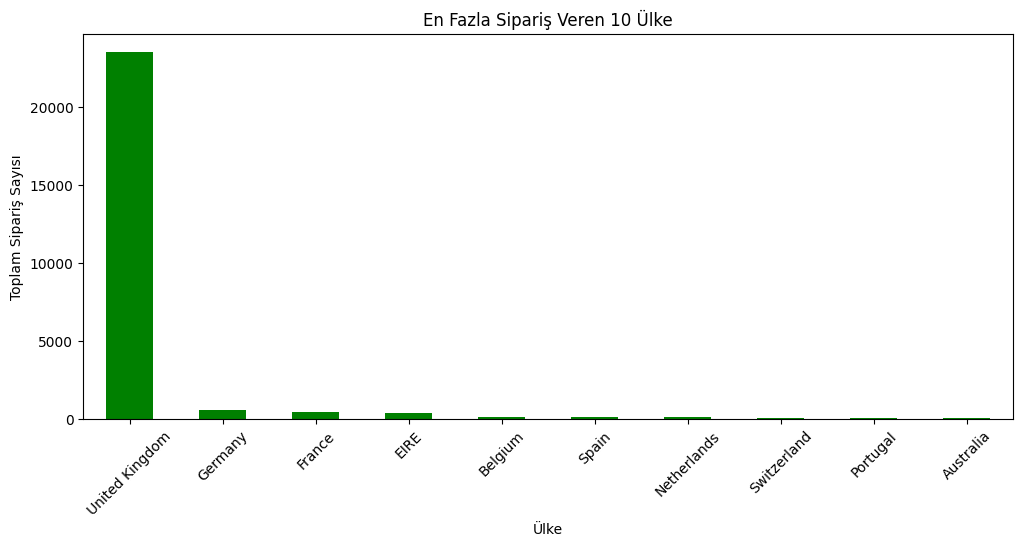

In [13]:
country_orders = df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
country_orders.head(10).plot(kind="bar", color="green")
plt.xlabel("Ülke")
plt.ylabel("Toplam Sipariş Sayısı")
plt.title("En Fazla Sipariş Veren 10 Ülke")
plt.xticks(rotation=45)
plt.show()


In [14]:
returns = df[df["Quantity"] < 0]

total_returns = returns["Quantity"].sum()
print(f"Toplam İade Edilen Ürün Sayısı: {abs(total_returns):,.0f}")


Toplam İade Edilen Ürün Sayısı: 484,531


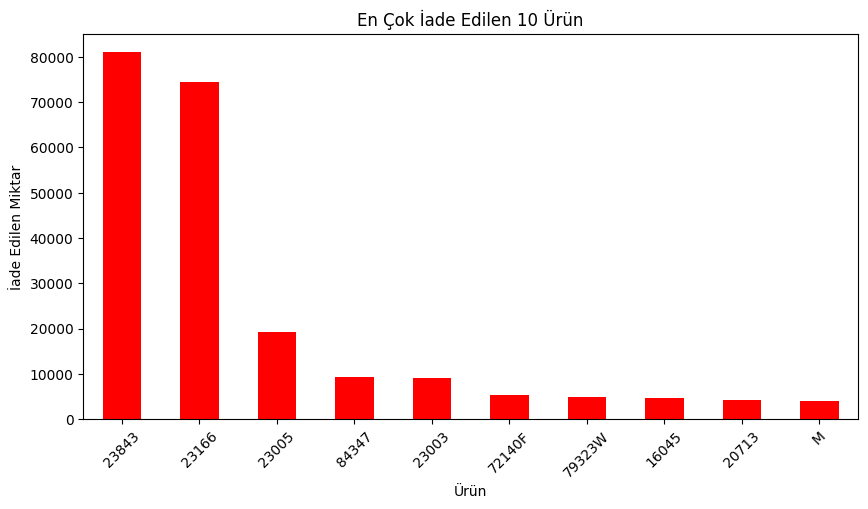

In [15]:
top_returned_products = returns.groupby("StockCode")["Quantity"].sum().abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_returned_products.plot(kind="bar", color="red")
plt.xlabel("Ürün")
plt.ylabel("İade Edilen Miktar")
plt.title("En Çok İade Edilen 10 Ürün")
plt.xticks(rotation=45)
plt.show()


In [19]:
df["CustomerID"] = df.groupby("InvoiceNo")["CustomerID"].transform(lambda x: x.fillna(method="ffill"))
df["CustomerID"] = df.groupby("InvoiceNo")["CustomerID"].transform(lambda x: x.fillna(method="bfill"))


C:\Users\hatice.kocabas\AppData\Local\Temp\ipykernel_7340\2525627204.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["CustomerID"] = df.groupby("InvoiceNo")["CustomerID"].transform(lambda x: x.fillna(method="ffill"))
C:\Users\hatice.kocabas\AppData\Local\Temp\ipykernel_7340\2525627204.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CustomerID"] = df.groupby("InvoiceNo")["CustomerID"].transform(lambda x: x.fillna(method="ffill"))
C:\Users\hatice.kocabas\AppData\Local\Temp\ipykernel_7340\2525627204.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["CustomerID"] = df.groupby("In

RFM Customer Segmentation

In [20]:
import datetime as dt

max_date = df["InvoiceDate"].max()

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (max_date - x.max()).days,  
    "InvoiceNo": "nunique",  
    "Revenue": "sum"  
})

rfm.columns = ["Recency", "Frequency", "Monetary"]

print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          2      0.00
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40


In [21]:
rfm["Recency_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])

rfm["Frequency_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])

rfm["Monetary_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])

rfm["RFM_Score"] = rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str) + rfm["Monetary_Score"].astype(str)

print(rfm.head())


            Recency  Frequency  Monetary Recency_Score Frequency_Score  \
CustomerID                                                               
12346.0         325          2      0.00             1               2   
12347.0           1          7   4310.00             4               4   
12348.0          74          4   1797.24             2               3   
12349.0          18          1   1757.55             3               1   
12350.0         309          1    334.40             1               1   

           Monetary_Score RFM_Score  
CustomerID                           
12346.0                 1       121  
12347.0                 4       444  
12348.0                 4       234  
12349.0                 4       314  
12350.0                 2       112  


In [22]:
def segment(x):
    if x in ["444", "443", "434", "433"]:
        return "En Değerli Müşteriler"
    elif x in ["333", "332", "323", "322"]:
        return "Sadık Müşteriler"
    elif x in ["111", "112", "121", "122"]:
        return "Uyuyan Müşteriler"
    else:
        return "Potansiyel Müşteriler"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)

print(rfm["Segment"].value_counts())


Segment
Potansiyel Müşteriler    2341
En Değerli Müşteriler     814
Uyuyan Müşteriler         803
Sadık Müşteriler          415
Name: count, dtype: int64


C:\Users\hatice.kocabas\AppData\Local\Temp\ipykernel_7340\3922084595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="viridis")


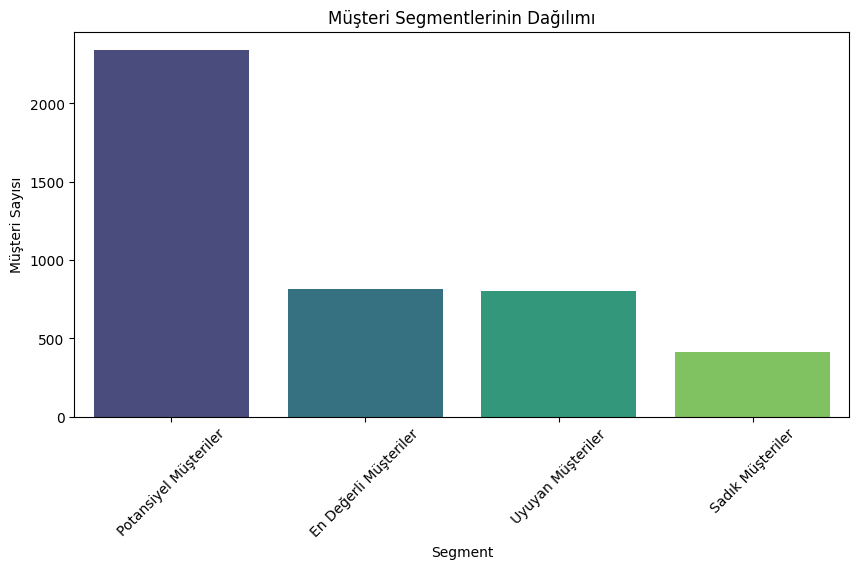

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Müşteri Segmentlerinin Dağılımı")
plt.xlabel("Segment")
plt.ylabel("Müşteri Sayısı")
plt.show()


In [25]:
vip_musteriler = rfm[rfm["Segment"] == "En Değerli Müşteriler"].sort_values(by="Monetary", ascending=False)
print(vip_musteriler.head(10))


            Recency  Frequency    Monetary Recency_Score Frequency_Score  \
CustomerID                                                                 
Unknown           0       3710  1447682.12             4               4   
14646.0           1         77   279489.02             4               4   
18102.0           0         62   256438.49             4               4   
17450.0           7         55   187482.17             4               4   
14911.0           0        248   132572.62             4               4   
14156.0           9         66   113384.14             4               4   
17511.0           2         46    88125.38             4               4   
16684.0           3         31    65892.08             4               4   
13694.0           3         60    62653.10             4               4   
15311.0           0        118    59419.34             4               4   

           Monetary_Score RFM_Score                Segment  
CustomerID                

In [26]:
sadik_musteriler = rfm[rfm["Segment"] == "Sadık Müşteriler"]
print(sadik_musteriler.describe())


          Recency   Frequency     Monetary
count  415.000000  415.000000   415.000000
mean    30.084337    3.115663   786.556316
std      9.237088    1.125515   344.530098
min     17.000000    1.000000   294.400000
25%     22.000000    2.000000   511.685000
50%     29.000000    3.000000   712.500000
75%     38.000000    4.000000  1014.275000
max     49.000000    5.000000  1610.460000


In [27]:
uyuyan_musteriler = rfm[rfm["Segment"] == "Uyuyan Müşteriler"]
print(uyuyan_musteriler.describe())


          Recency   Frequency     Monetary
count  803.000000  803.000000   803.000000
mean   258.717310    1.275218   237.804545
std     67.169054    0.471344   248.789103
min    143.000000    1.000000 -4287.630000
25%    203.000000    1.000000   133.695000
50%    259.000000    1.000000   221.190000
75%    311.000000    2.000000   346.790000
max    373.000000    3.000000   642.020000


K-MEANS CUSTOMER SEGMENTATION


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ["Recency", "Frequency", "Monetary"]  

scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm[features])



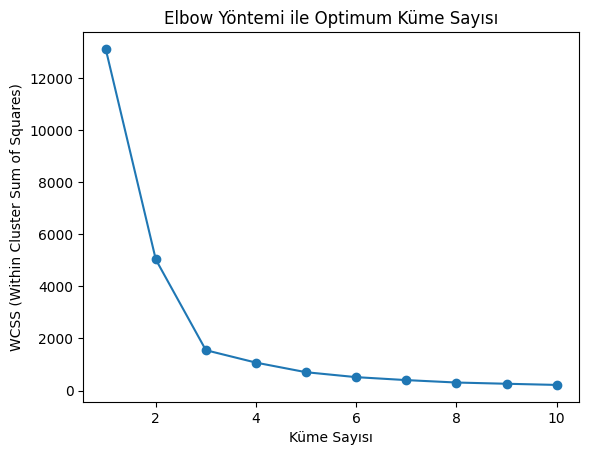

In [29]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Küme Sayısı")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Yöntemi ile Optimum Küme Sayısı")
plt.show()


In [34]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["Segment"] = kmeans.fit_predict(scaled_features)


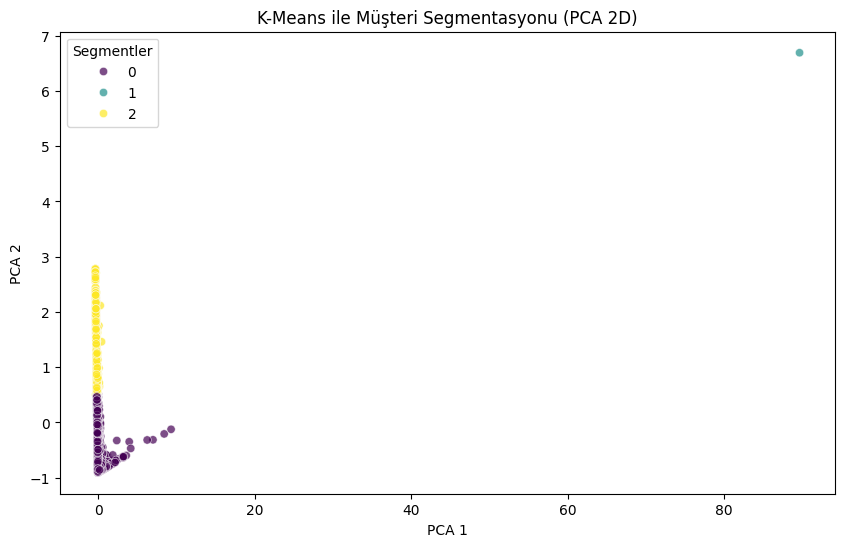

In [35]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=rfm["Segment"], palette="viridis", alpha=0.7)
plt.title("K-Means ile Müşteri Segmentasyonu (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Segmentler")
plt.show()


In [37]:
cluster_summary = rfm.groupby("Segment")[["Recency", "Frequency", "Monetary"]].mean()
cluster_summary


,Recency,Frequency,Monetary
Segment,,,
0,39.44965,6.128385,2.367546e+03
1,0.00000,3710.000000,1.447682e+06
2,247.36129,1.885714,4.773670e+02


Segment 0 - Ortalama Müşteriler, Segment 1 - VIP Müşteriler (En Değerli Müşteriler) ve Segment 2 - Uyuyan Müşteriler (Geri Kazanılması Gerekenler) şeklinde yorumlanabilir. 